In [64]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt


In [65]:
df = pd.read_csv("laptop_data.csv")
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [67]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


In [69]:
# Data Preprocessing
# Ensure appropriate data types
df['Ram'] = df['Ram'].str.extract('(\d+)').astype(float)
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

In [70]:
# Split categorical and numerical columns
categorical_cols = ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']
numerical_cols = ['Inches', 'Ram', 'Weight']


In [71]:
# Define preprocessing steps
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

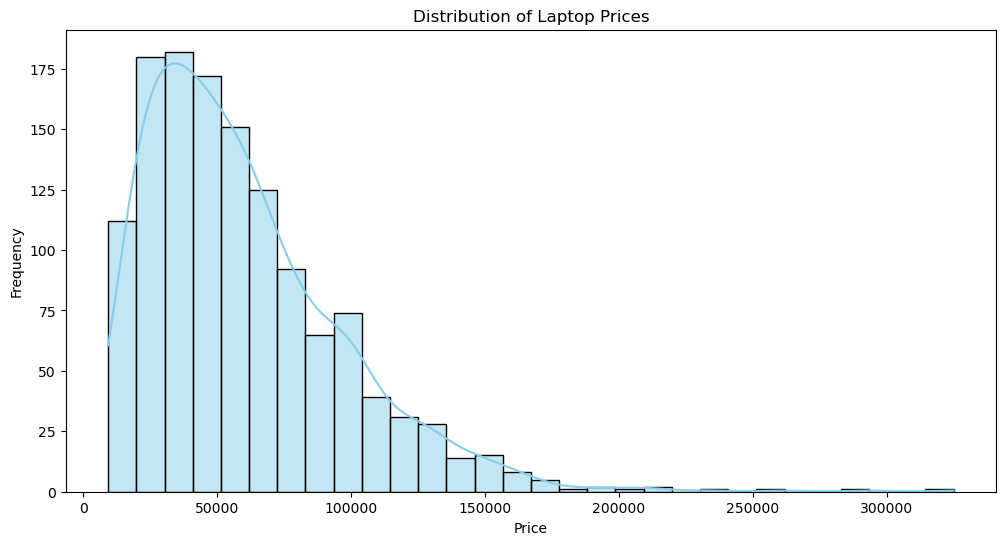

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of prices
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

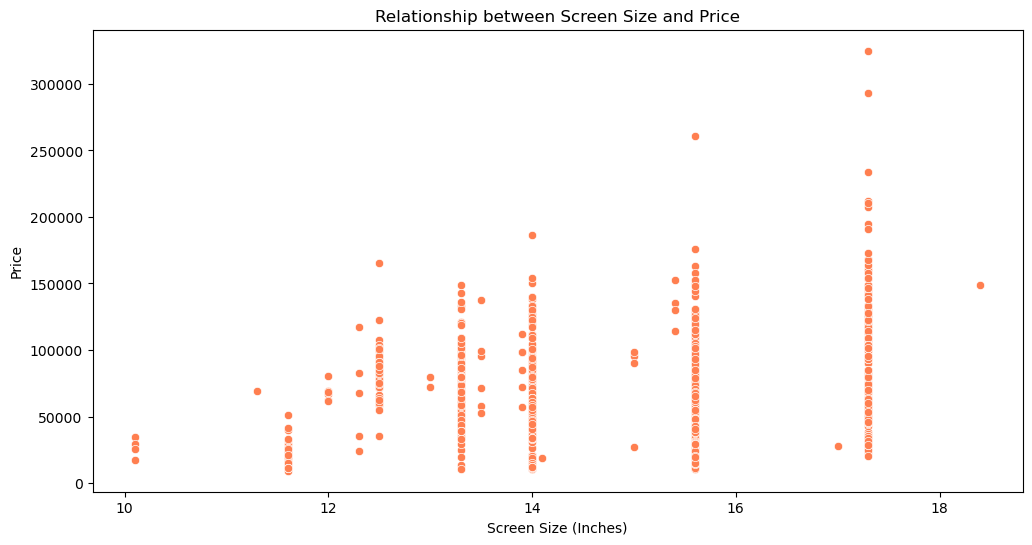

In [73]:
# Visualize the relationship between screen size and price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Inches', y='Price', data=df, color='coral')
plt.title('Relationship between Screen Size and Price')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Price')
plt.show()

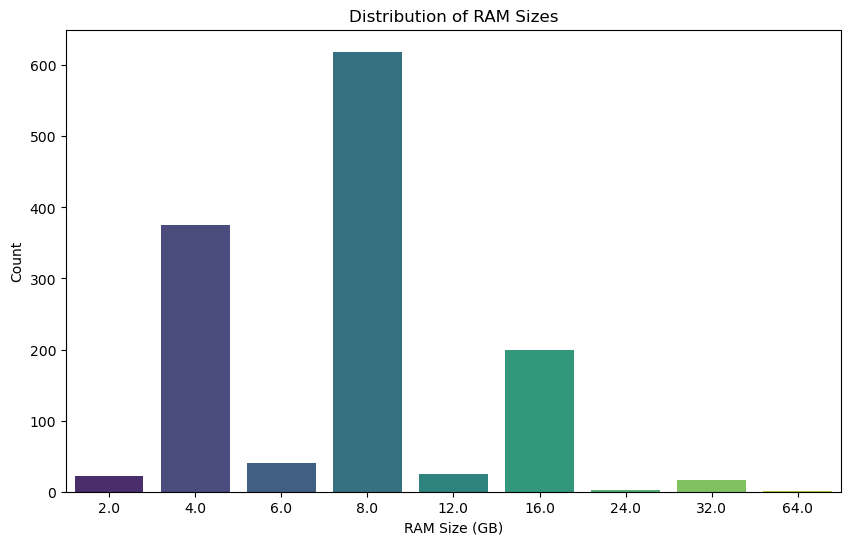

In [74]:
# Visualize the distribution of RAM
plt.figure(figsize=(10, 6))
sns.countplot(x='Ram', data=df, palette='viridis')
plt.title('Distribution of RAM Sizes')
plt.xlabel('RAM Size (GB)')
plt.ylabel('Count')
plt.show()

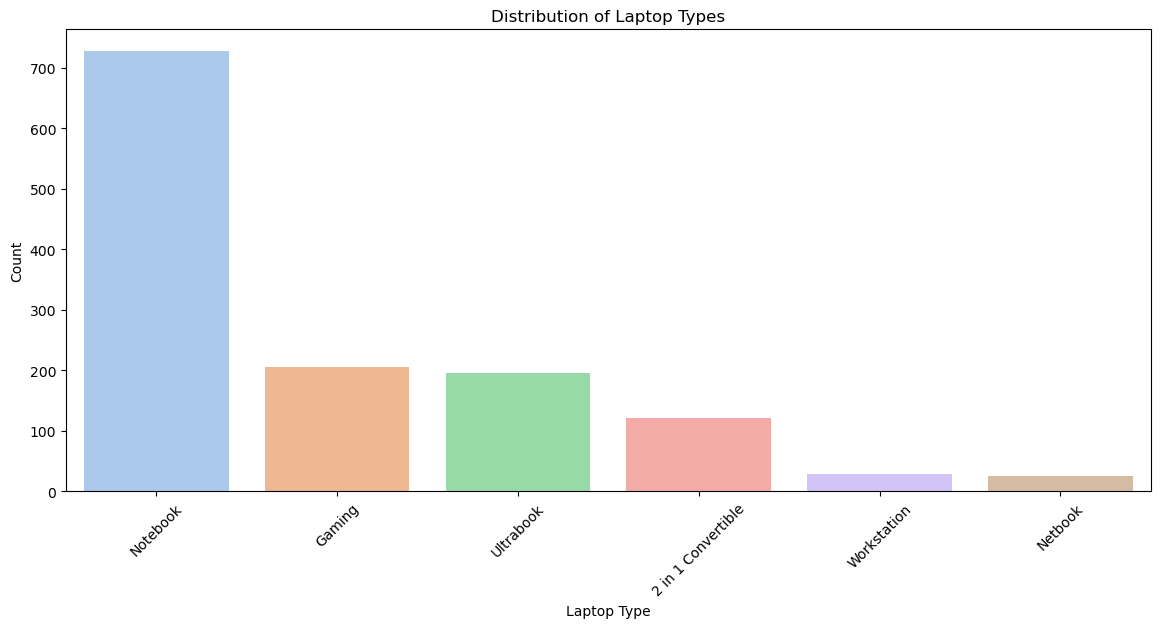

In [75]:
# Visualize the distribution of laptop types
plt.figure(figsize=(14, 6))
sns.countplot(x='TypeName', data=df, palette='pastel', order=df['TypeName'].value_counts().index)
plt.title('Distribution of Laptop Types')
plt.xlabel('Laptop Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

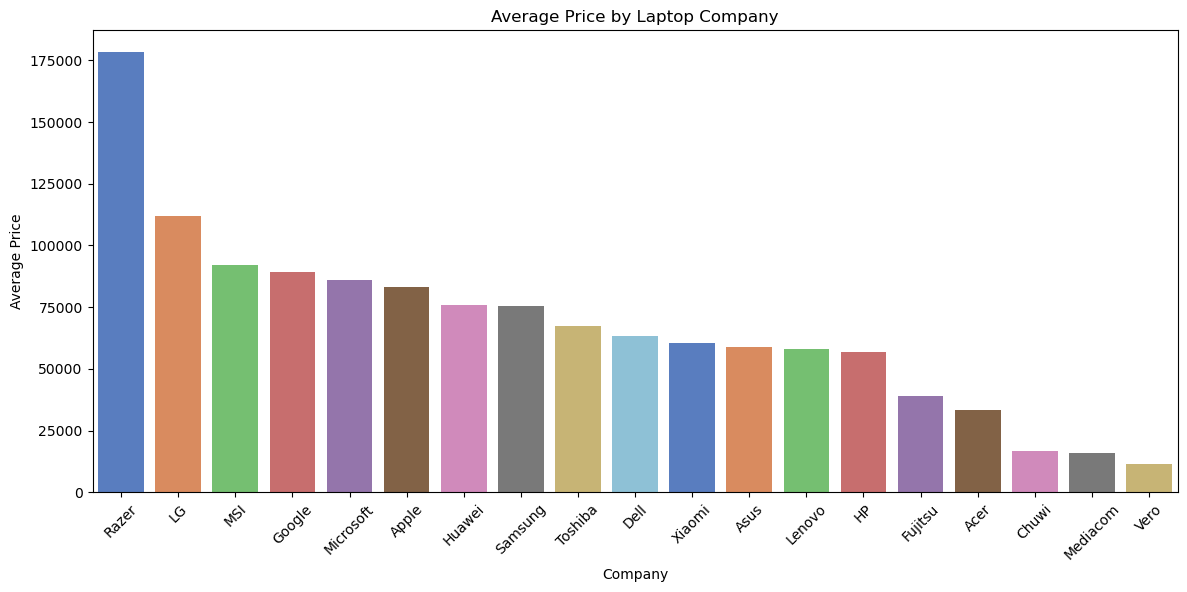

In [76]:
# Visualize the average price per company
plt.figure(figsize=(14, 6))
avg_price_by_company = df.groupby('Company')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_company.index, y=avg_price_by_company.values, palette='muted')
plt.title('Average Price by Laptop Company')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

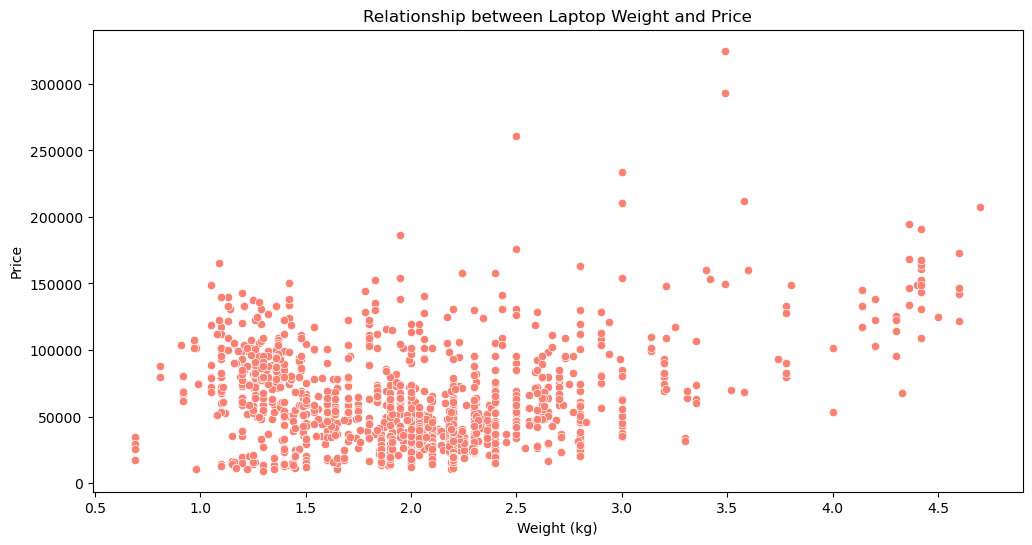

In [77]:
# Visualize the relationship between weight and price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Weight', y='Price', data=df, color='salmon')
plt.title('Relationship between Laptop Weight and Price')
plt.xlabel('Weight (kg)')
plt.ylabel('Price')
plt.show()

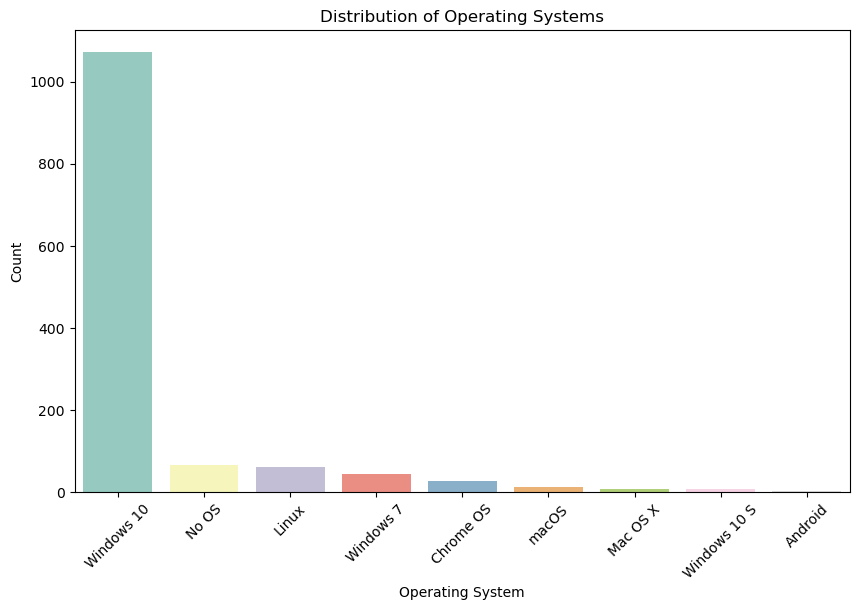

In [78]:
# Visualize the distribution of operating systems
plt.figure(figsize=(10, 6))
sns.countplot(x='OpSys', data=df, palette='Set3', order=df['OpSys'].value_counts().index)
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

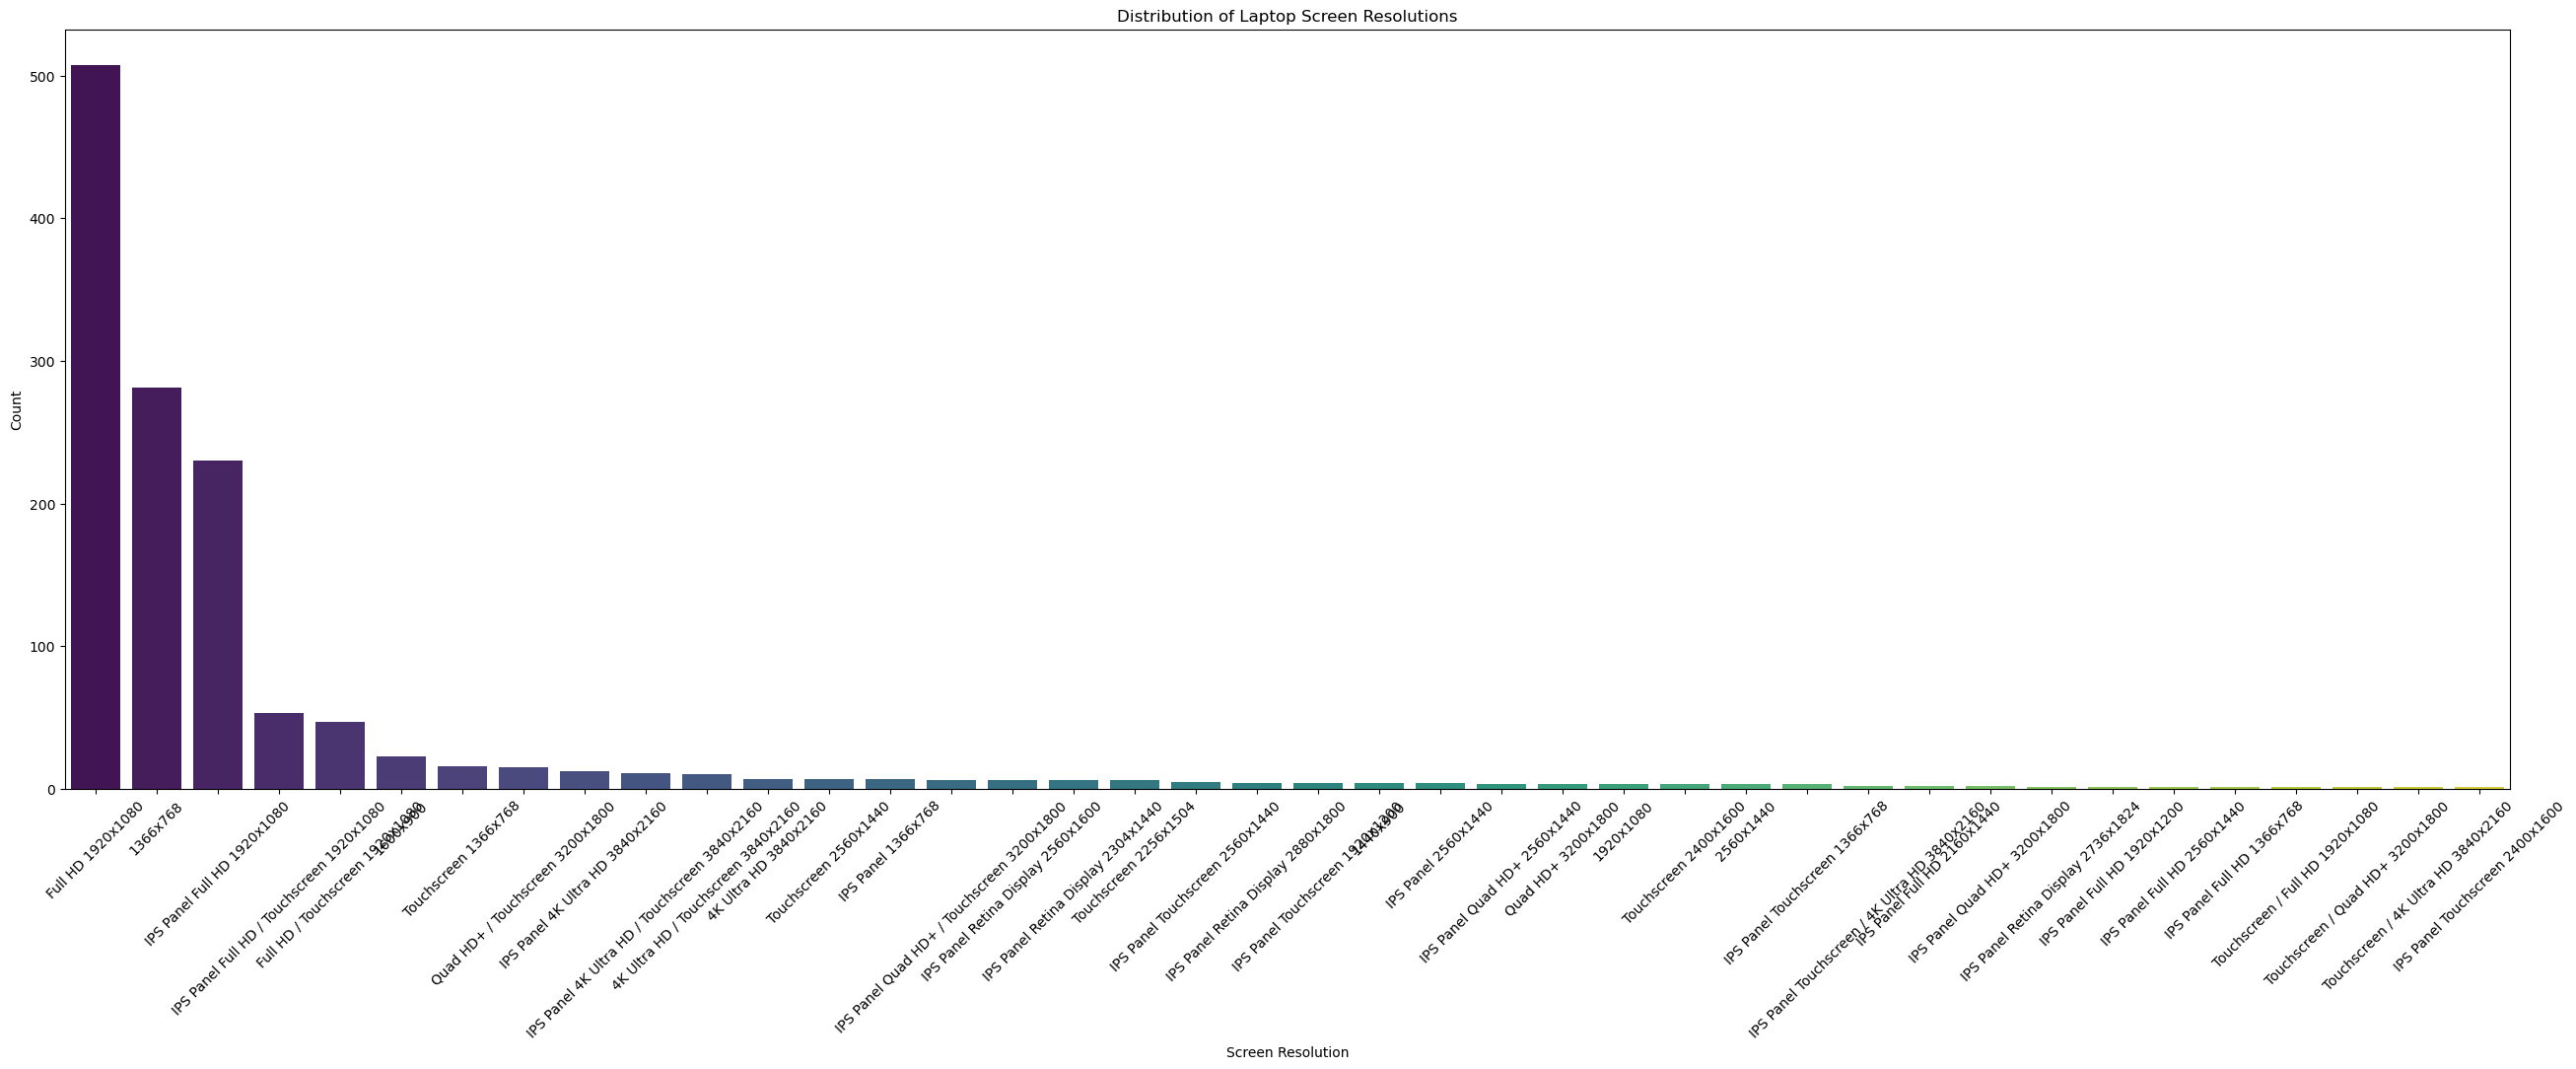

In [79]:
# Visualize the distribution of laptop screen resolutions
plt.figure(figsize=(32, 10))
sns.countplot(x='ScreenResolution', data=df, palette='viridis', order=df['ScreenResolution'].value_counts().index)
plt.title('Distribution of Laptop Screen Resolutions')
plt.xlabel('Screen Resolution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [80]:
# Normalize or scale numerical features
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [81]:
# Create a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', regressor)])

In [82]:
# Extract relevant information
df['CombinedPerformance'] = df['Cpu'].astype(str) + df['Ram'].astype(str) + df['Gpu'].astype(str)

In [83]:
# Train-Test Split
X = df.drop('Price', axis=1)
y = df['Price']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
# Model Selection & Training
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Inches', 'Ram', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'ScreenResolution', 'Cpu',
                                                   'Memory', 'Gpu',
                                                   'OpSys'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [86]:
model.score(X_train,y_train)

0.9750403028602319

In [87]:
import numpy as np

# Simulate dynamic pricing based on demand, competitor pricing, and customer behavior
def dynamic_pricing_optimization(base_price, demand_factor, competitor_price_factor, customer_behavior_factor):
    # You can define more complex rules here based on your business logic
    optimized_price = base_price * demand_factor * competitor_price_factor * customer_behavior_factor
    
    # Add some randomness to simulate real-world fluctuations
    optimized_price += np.random.normal(loc=0, scale=5)  # Adjust the scale based on your preferences
    
    # Ensure the price is not negative
    optimized_price = max(optimized_price, 0)
    
    return optimized_price

# Example usage:
base_price = 1000  # Set your initial base price

# Simulate factors (you can replace these with real-world data)
demand_factor = 1.2
competitor_price_factor = 0.9
customer_behavior_factor = 1.1

# Get the dynamically optimized price
optimized_price = dynamic_pricing_optimization(base_price, demand_factor, competitor_price_factor, customer_behavior_factor)

print(f'Original Price: {base_price}')
print(f'Optimized Price: {optimized_price}')


Original Price: 1000
Optimized Price: 1195.2894278773092


- Base_price                    is the initial price you set.
- Demand_factor                 represents the demand for the product, where values greater than 1 indicate high demand.
- Competitor_price_factor       represents the competitiveness of your price relative to competitors.
- Customer_behavior_factor      represents the impact of customer behavior on pricing.

In [88]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [89]:
# Define additional regression models
linear_regressor = LinearRegression()
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [90]:
# Create pipelines for each model
linear_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', linear_regressor)])

gb_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', gradient_boosting_regressor)])

In [91]:
# Train-Test Split
X = df.drop('Price', axis=1)
y = df['Price']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
# Train and evaluate Linear Regression
linear_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Inches', 'Ram', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'ScreenResolution', 'Cpu',
                                                   'Memory', 'Gpu',
                                                   'OpSys'])])),
                ('regressor', LinearRegression())])

In [95]:
linear_model.score(X_train,y_train)

0.9201370355175633

In [96]:
# Train and evaluate Gradient Boosting Regression
gb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['Inches', 'Ram', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Company', 'TypeName',
                                                   'ScreenResolution', 'Cpu',
                                                   'Memory', 'Gpu',
                                                   'OpSys'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [97]:
gb_model.score(X_train,y_train)

0.8887165364562832